# PCA

PCA  can  be  implemented  very  simply  in  Matlab  or  Python.   Given  a  dataset  (as  amatrix X), the covariance matrix can be found using the Matlab covariance function (cov(X)).Then, the eigenvectors and eigenvalues of this covariance matrix are the principal component(vectors) and principal values respectively.  The eigenvalues reflect the amount of variance accounted  for  by  each  principal  component.   To  perform  dimensionalityreduction (e.g.  down to 2 dimensions), we need to multiply X by the two eigenvectors withthe largest corresponding eigenvalues.

In [2]:
import numpy as np
# We assume that our data is of the shape [n_samples, n_features]

In [17]:
def PCA(X, n_components=2):
    cov_X = np.cov(X, rowvar=False)
    eig_vals, eig_vecs = np.linalg.eig(cov_X)
    eig_vals = np.absolute(eig_vals)
    inds = np.flip(np.argsort(eig_vals))
    return np.matmul(X,eig_vecs[:,inds[:n_components]]), eig_vals   

In [15]:
from scipy.io import loadmat

In [16]:
mnist = loadmat('mnist_train.mat')

In [11]:
X = mnist['train_X']
Y = mnist['train_labels']

For the MNIST dataset, run your PCA function on the data. 
1. Produce a plot of the data in the space spanned by the first two principal components.  Colour each point by its class.



In [23]:
X_reduced, eig_vals = PCA(X,n_components=2)

In [26]:
X_reduced.shape

(60000, 2)

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
cY = Y[:,0]-1

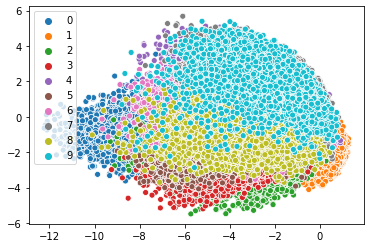

In [34]:
sns.scatterplot(X_reduced[:,0],X_reduced[:,1], hue=cY, palette=sns.color_palette())

In [47]:
colours = sns.color_palette()

In [51]:
colours[1]

(1.0, 0.4980392156862745, 0.054901960784313725)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

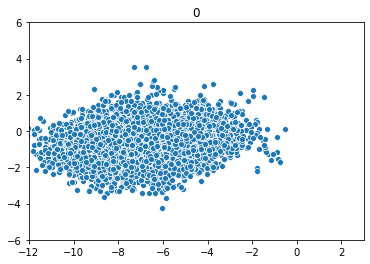

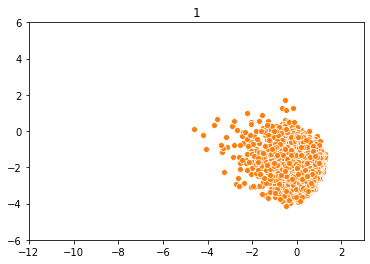

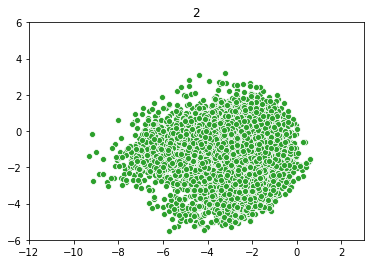

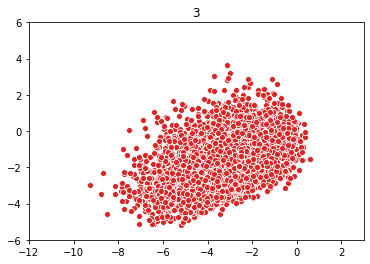

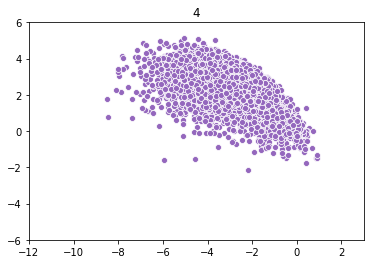

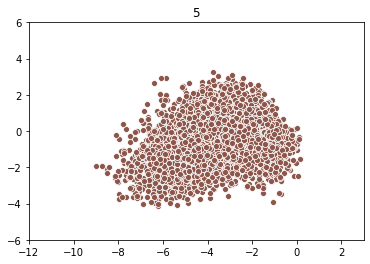

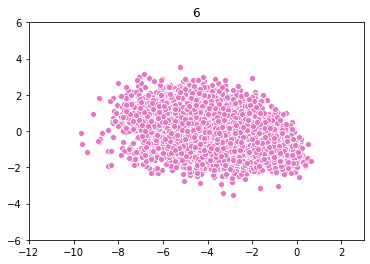

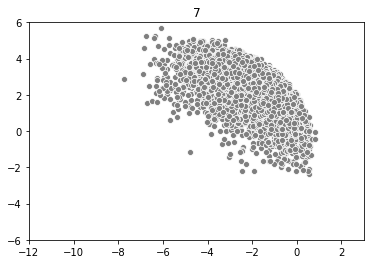

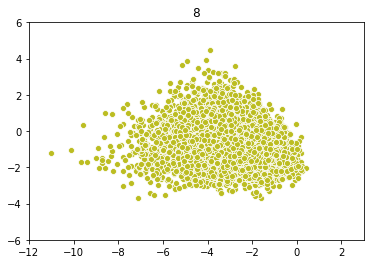

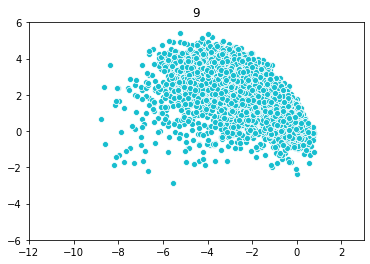

<Figure size 432x288 with 0 Axes>

In [57]:
for label in np.unique(cY):
    inds = cY==label
    sns.scatterplot(X_reduced[inds,0],X_reduced[inds,1], c=colours[label])
    plt.title(label)
    plt.ylim([-6,6])
    plt.xlim([-12,3])
    plt.figure()

2. What percentage of the data variance is accounted for by the first two principal components?

In [61]:
(eig_vals[:3].sum()/eig_vals.sum())*100

22.969677181176515

3. From the results, produce a Scree graph similar to that shown in Fig 6.2 of theAlpaydin text.

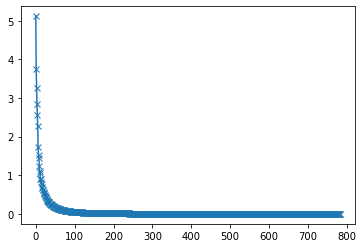

In [66]:
plt.plot(eig_vals, '-x')

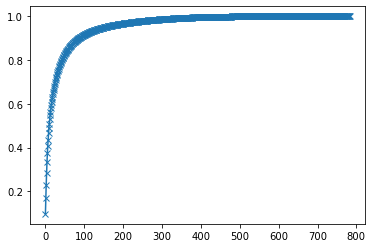

In [67]:
plt.plot(np.cumsum(eig_vals)/np.sum(eig_vals), '-x')

Repeat the procedure above using the Swissroll and Diabetes datasets.  For MNIST,compare a plot visualising only 2 digits with a plot visualising 10 digits.

# t-SNE
Run the t-SNE algorithm on 6000 datapoints from the MNIST dataset:
2. load(’mnist_train.mat’);
3. idx = unidrnd(60000, 6000, 1);
4. x = train_X(idx, :);
5. labels = train_labels(idx);
6. tsne(x, labels, 2, 30, 30)

In one or two sentences, explain how t-SNE differs from SNE.

In one or two sentences, explain lines 3, 4 and 5 in the code snippet above.

Provide a screenshot of the 2-dimensional visualisation after 300 iterations.  Plot theerror at each iteration up to 300 iterations in steps of 10.

In  3-4  sentences,  explain  lines  51-53  and  lines  87-89  in  tsnep.m  in  relation  to  anyfeatures you observe in your plot.  Why has the code been written in this way?  (Hint- read the paper).

Comment out lines 51-53 and 87-89.  Run t-SNE for 300 iterations for perplexity valuesranging from 10 to 300 in steps of 10.  Produce a 3D plot with perplexity and iterationson the horizontal axis and cost on the vertical axis.

After consulting your plot, comment on the following statement:A lower cost valuealways produces a better visualisation.Choose a suitable perplexity value and providethe visualisation in 2D space after 300 iterations for your chosen perplexity.  Comparethis with your result in (Q3).

Run t-SNE (without PCA as a preprocessing step and with lines 51−53 and 87−89uncommented) on the Swissroll and Diabetes datasets.  Comment on the visualisationsit produces.  Provide the parameters you used

Additional Resources:
* How to use t-SNE Effectively - http://distill.pub/2016/misread-tsne/One of the first articles on the new research platform called Distill.
* Gradient-Based Optimization - Chapter 4.3 of Deep Learning available onlinehttp://www.deeplearningbook.org/contents/numerical.htmlWe will be revisiting gradient descent later when training neural networks